# pdf&...

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)

    L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[9, 5, 7, 9, 10]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0266
3     0.0809
4     0.1666
5     0.2831
6     0.4168
7     0.5838
8     0.7264
9     0.8359
10    0.9151
11    0.9719
12    1.0000
Name: count, dtype: float64

<Axes: >

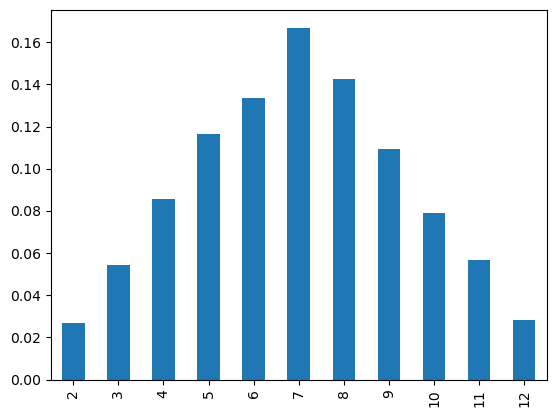

In [8]:
s.plot(kind='bar')

<Axes: >

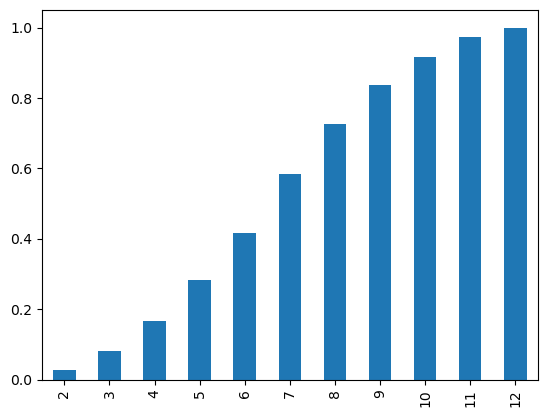

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [12]:
sample.mean()

50.21541759054729

(array([  1.,   0.,   6.,  59., 168., 307., 255., 162.,  39.,   3.]),
 array([25.73882992, 29.8775737 , 34.01631747, 38.15506125, 42.29380502,
        46.4325488 , 50.57129258, 54.71003635, 58.84878013, 62.9875239 ,
        67.12626768]),
 <BarContainer object of 10 artists>)

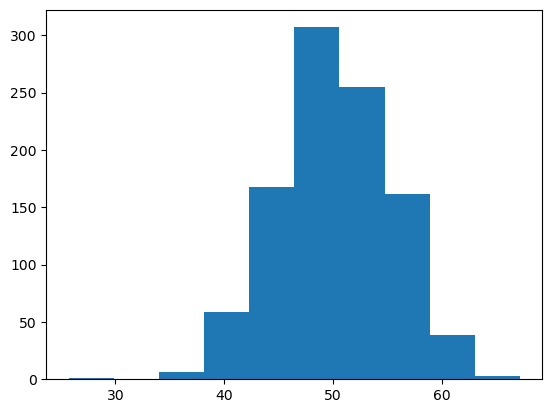

In [13]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [14]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [15]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [16]:
values = np.linspace(sample.min(),sample.max(),100)

In [17]:
sample.max()

67.12626767774742

In [18]:
probabilities = [dist.pdf(value) for value in values]

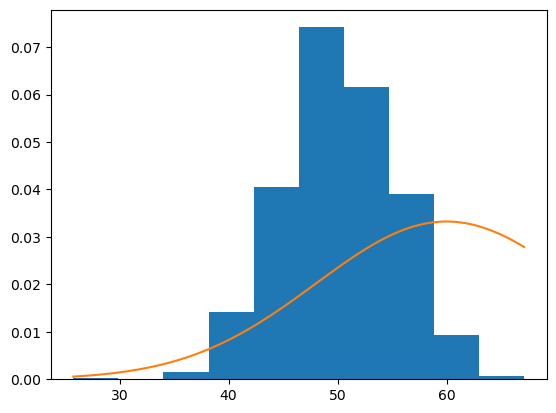

In [19]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

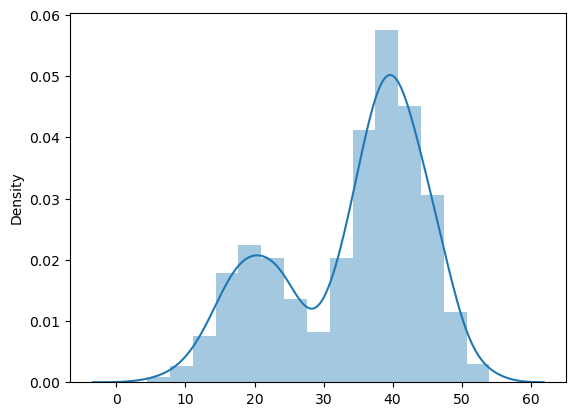

In [53]:
import seaborn as sns
sns.distplot(sample)
import warnings
warnings.filterwarnings('ignore')

# KDE

In [22]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [23]:
sample[7]

16.59220721505832

(array([ 1.,  0.,  1.,  3.,  0.,  5.,  4.,  4., 10.,  9., 13., 17., 23.,
        19., 17., 29., 20., 21., 18., 23., 21., 15.,  8.,  6., 11.,  5.,
         8., 21., 19., 25., 36., 30., 51., 51., 55., 61., 60., 49., 37.,
        45., 30., 27., 38., 18., 12., 12.,  4.,  0.,  3.,  5.]),
 array([ 4.44153206,  5.43301814,  6.42450423,  7.41599031,  8.40747639,
         9.39896248, 10.39044856, 11.38193464, 12.37342073, 13.36490681,
        14.35639289, 15.34787897, 16.33936506, 17.33085114, 18.32233722,
        19.31382331, 20.30530939, 21.29679547, 22.28828156, 23.27976764,
        24.27125372, 25.26273981, 26.25422589, 27.24571197, 28.23719806,
        29.22868414, 30.22017022, 31.21165631, 32.20314239, 33.19462847,
        34.18611456, 35.17760064, 36.16908672, 37.16057281, 38.15205889,
        39.14354497, 40.13503106, 41.12651714, 42.11800322, 43.1094893 ,
        44.10097539, 45.09246147, 46.08394755, 47.07543364, 48.06691972,
        49.0584058 , 50.04989189, 51.04137797, 52.03286405,

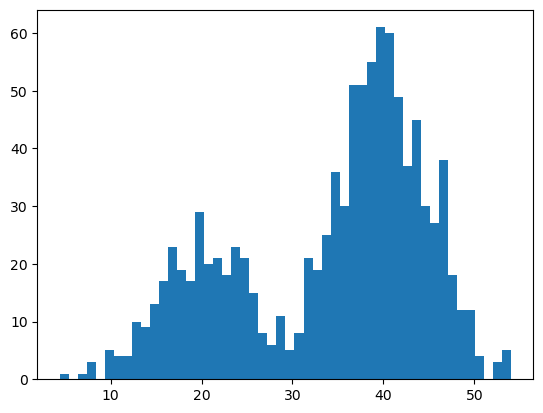

In [24]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [25]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [26]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [27]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

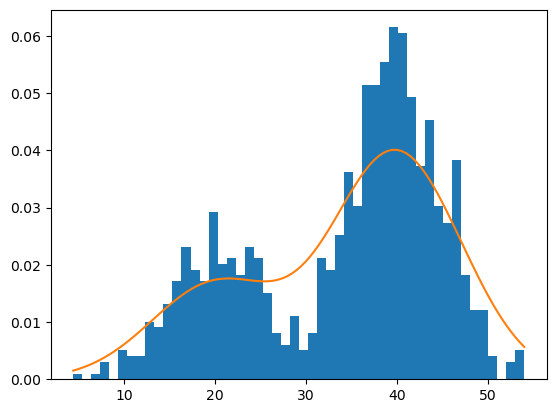

In [28]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

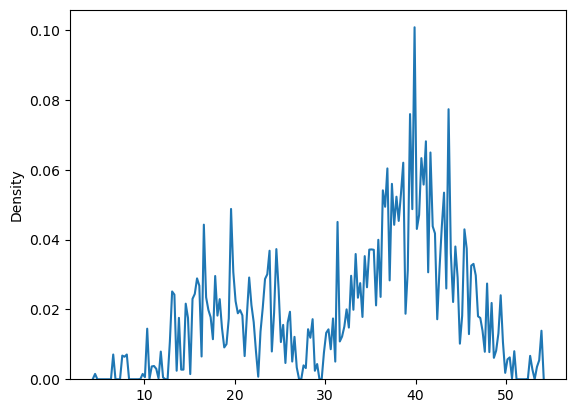

In [29]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [30]:
import seaborn as sns

In [31]:
df = pd.read_csv(r"C:\Users\goura\Downloads\archive\Iris.csv")

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

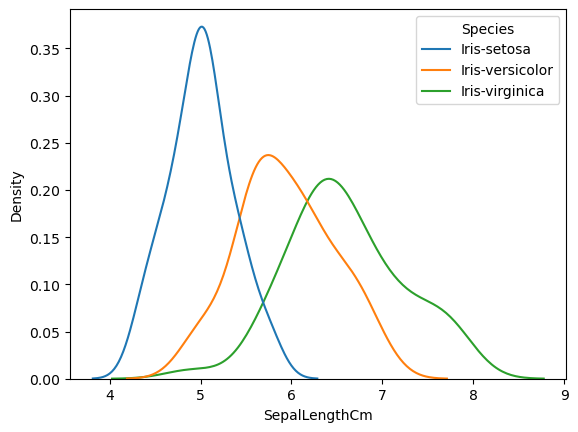

In [33]:
sns.kdeplot(data=df,x='SepalLengthCm',hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

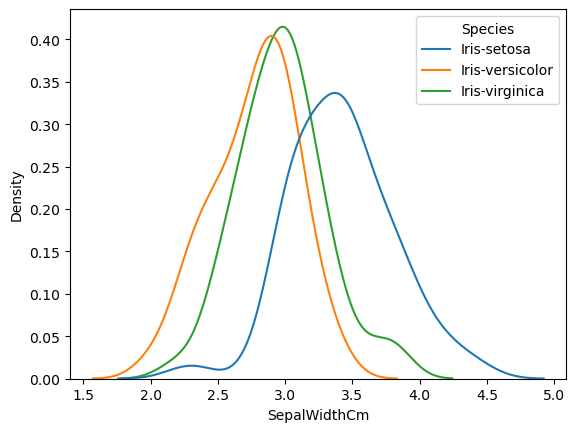

In [34]:
sns.kdeplot(data=df,x='SepalWidthCm',hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

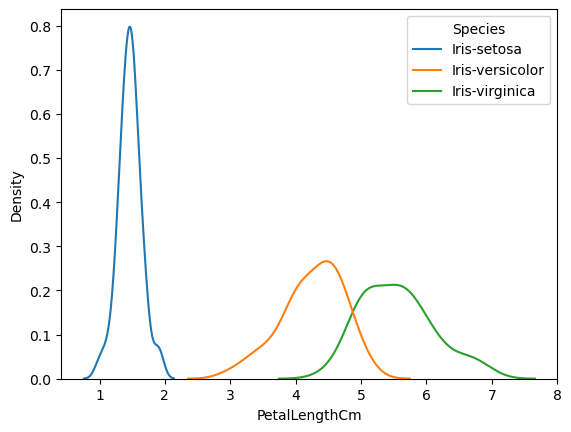

In [35]:
sns.kdeplot(data=df,x='PetalLengthCm',hue='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

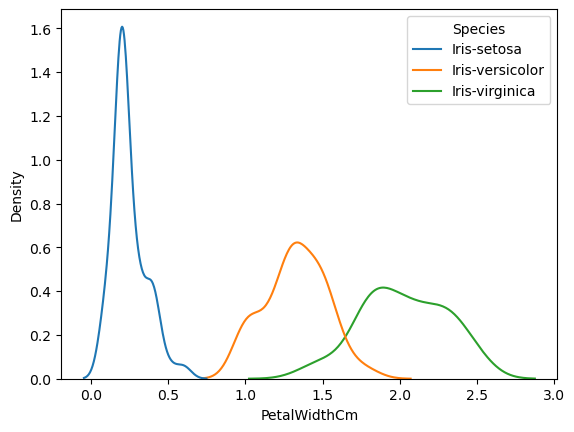

In [36]:
sns.kdeplot(data=df,x='PetalWidthCm',hue='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

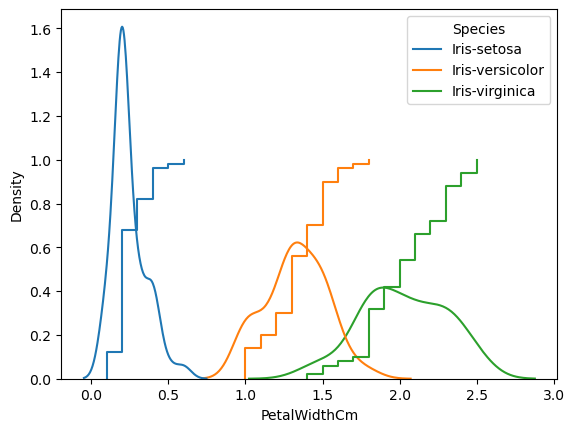

In [37]:
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species')
sns.ecdfplot(data=df, x='PetalWidthCm', hue='Species')

In [38]:
titanic = pd.read_csv(r"C:\Users\goura\Downloads\archive (1)\tested.csv")

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

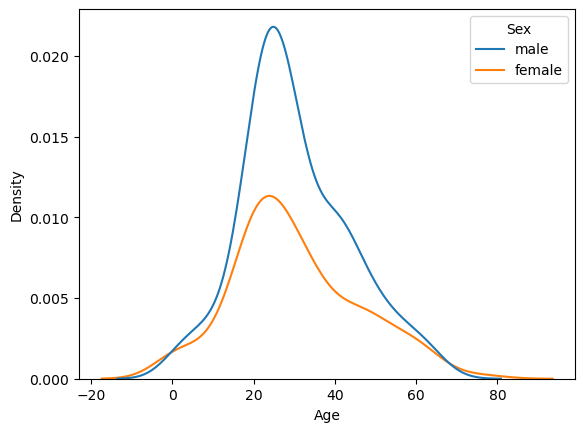

In [40]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

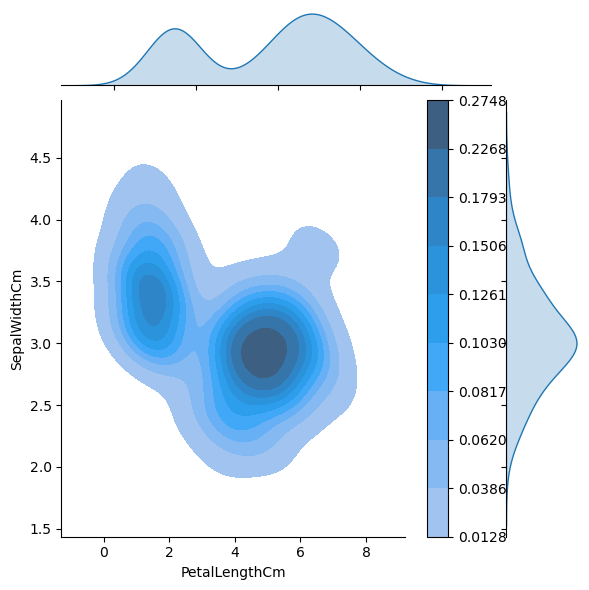

In [41]:
 sns.jointplot(data=df, x="PetalLengthCm", y="SepalWidthCm", kind="kde",
               fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

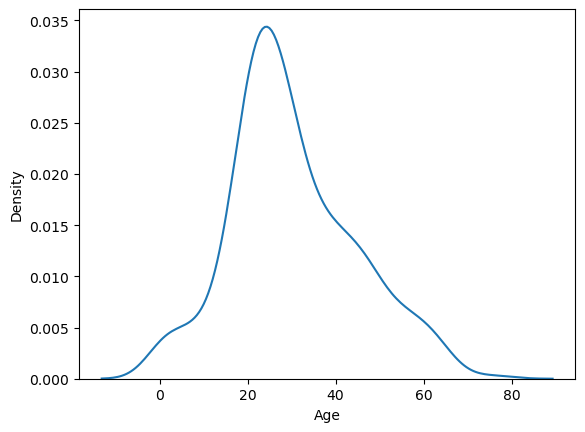

In [42]:
sns.kdeplot(titanic['Age'])

In [43]:
titanic['Age'].mean()

30.272590361445783

In [44]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

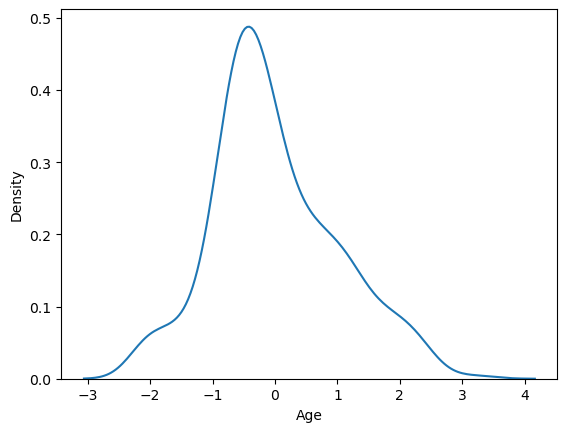

In [45]:
sns.kdeplot(x)

In [46]:
x.mean()

2.140188963132832e-17

In [47]:
x.std()

1.0

In [48]:
titanic['Age'].skew()

0.4573612871503845

In [49]:
titanic['Age'].mean() + 3*titanic['Age'].std()

72.81621806831905

In [50]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-12.271037345427477

In [51]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S


In [52]:
titanic['Age'].max()

76.0